In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print("Done")

Done


In [2]:
from main_classes.voltage_maps import VoltageMapCollection
from main_classes.epsilon_cover import BasicCoverTree, run_cover_properties_test, estimate_span
from utilities.generate_toy_data import non_uniform_1d_experiment
print("DONE")

DONE


### Load data

In [3]:
data, _, _ = non_uniform_1d_experiment()
print(data.shape)

(12000, 1)


### Build epsilon covers

In [11]:
epsilon_reduce_factor = 2
init_radius = estimate_span(data)
epsilon_cover_factory = BasicCoverTree(init_radius)
for x in data:
    epsilon_cover_factory.insert(x)
print("DONE")

DONE


##### Estimate densities

In [12]:
centers_dict = epsilon_cover_factory.get_centers()
data_density_estimation, ref_epsilon_cover, ref_epsilon_cover_densities = non_uniform_1d_experiment()
densities = epsilon_cover_factory.estimate_densities(data_density_estimation)
print("DONE")

DONE


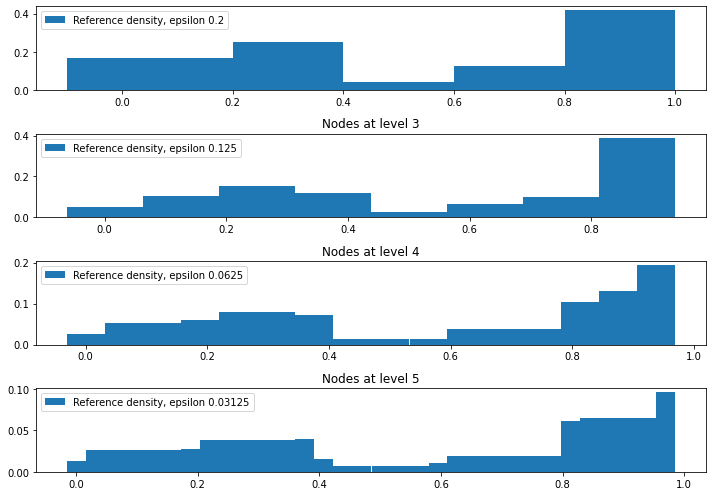

In [13]:
%matplotlib inline
epsilon = 0.2
lvlstart = 3
lvlstop = 6


max_lvl = min(5, len(centers_dict))
fig, axes = plt.subplots(lvlstop-lvlstart+1, 1, figsize=(10, 7))
axes[0].bar(x=ref_epsilon_cover.flatten(), height=ref_epsilon_cover_densities, width=epsilon, label=f'Reference density, epsilon {epsilon}', align='center')
axes[0].legend()
for i, lvl in enumerate(range(lvlstart, lvlstop)):
    centers = centers_dict[lvl]
    epsilon = init_radius / (epsilon_reduce_factor ** lvl)

    axes[i+1].set_title(f'Nodes at level {lvl}')
    axes[i+1].bar(x=np.array(centers).flatten(), height=densities[lvl], 
                   width=epsilon, label=f'Reference density, epsilon {epsilon}', align='center')
    axes[i+1].legend()
plt.tight_layout()
plt.show()

Plot level 1
Number of centers lvl 1 = 3
Plot level 2
Number of centers lvl 2 = 4
Plot level 3
Number of centers lvl 3 = 8
Plot level 4
Number of centers lvl 4 = 16
Plot level 5
Number of centers lvl 5 = 32


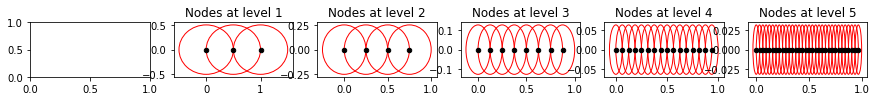

In [14]:
%matplotlib inline
centers_dict = epsilon_cover_factory.get_centers()

max_lvl = min(5, len(centers_dict))
fig, axes = plt.subplots(1, max_lvl+1, figsize=(15, 1))
for lvl in range(1, max_lvl+1):
    centers = centers_dict[lvl]
    print(f'Plot level {lvl}')
    print(f'Number of centers lvl {lvl} = {len(centers)}')
    radius = init_radius / (epsilon_reduce_factor ** lvl)
    for center in centers:
        axes[lvl].set_title(f'Nodes at level {lvl}')
        axes[lvl].add_patch(plt.Circle(tuple([center, 0]),
                                    radius=radius, color='r', fill=False))
        axes[lvl].scatter(center, 0, s=20, c='k', marker='o', zorder=2)

plt.show()

### Construct voltage map collection and propagate voltages

In [ ]:
voltage_map_collections = {}

In [ ]:
centers = epsilon_cover_factory.get_centers(lvl=2)
voltage_map_collections[f'lvl{2}'] = VoltageMapCollection(epsilon_cover, rougher_epsilon_cover, source_indices)